# Thuto Wesley Sephai
## Betway / Jackpot City Graduate Program
## Solving Coding Problems


## 10. NBA player statistics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
df = pd.read_csv("NBA_2024_cleaned.csv")

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3621 entries, 0 to 3620
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  3621 non-null   object 
 1   Pos     3621 non-null   object 
 2   Age     3621 non-null   int64  
 3   Tm      3621 non-null   object 
 4   G       3621 non-null   int64  
 5   GS      3621 non-null   int64  
 6   MP      3621 non-null   float64
 7   FG      3621 non-null   float64
 8   FGA     3621 non-null   float64
 9   FG%     3621 non-null   float64
 10  3P      3621 non-null   float64
 11  3PA     3621 non-null   float64
 12  3P%     3621 non-null   float64
 13  2P      3621 non-null   float64
 14  2PA     3621 non-null   float64
 15  2P%     3621 non-null   float64
 16  eFG%    3621 non-null   float64
 17  FT      3621 non-null   float64
 18  FTA     3621 non-null   float64
 19  FT%     3621 non-null   float64
 20  ORB     3621 non-null   float64
 21  DRB     3621 non-null   float64
 22  

In [16]:
high_scorers = df[df['PTS'] >= 20] # 'high scorers' as players with PTS >= 20

In [17]:
print(high_scorers.head()) # the high scorers

                   Player Pos  Age   Tm   G  GS    MP    FG   FGA    FG%  ...  \
1             Bam Adebayo   C   26  MIA  10  10  34.7   8.4  16.0  0.525  ...   
7   Giannis Antetokounmpo  PF   29  MIL  10  10  32.5  11.0  18.9  0.582  ...   
12            LaMelo Ball  PG   22  CHO  10  10  33.5   7.7  18.4  0.418  ...   
14           Desmond Bane  SG   25  MEM  11  11  34.7   9.4  20.5  0.456  ...   
17         Scottie Barnes  SG   22  TOR  11  11  35.7   7.9  16.6  0.475  ...   

      FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
1   0.803  2.3  8.2  10.5  3.8  1.4  1.4  2.9  2.3  23.0  
7   0.639  2.3  7.3   9.6  3.6  0.9  1.3  4.3  2.9  29.5  
12  0.844  1.9  3.5   5.4  8.6  1.6  0.3  4.0  4.0  22.2  
14  0.841  0.6  3.8   4.5  4.5  1.5  0.9  2.6  3.0  25.5  
17  0.761  3.0  6.6   9.6  5.7  1.7  1.6  2.5  2.4  20.9  

[5 rows x 29 columns]


In [18]:
# mean for the specified metrics for high scorers and non-high scorers
metrics = ['FGA', '3PA', 'FT', 'AST', 'TRB']


In [19]:
# mean values for high scorers
high_scorers_means = high_scorers[metrics].mean()


In [20]:
# 'non-high scorers' as players with PTS < 20
non_high_scorers = df[df['PTS'] < 20]


In [21]:
# mean values for non-high scorers
non_high_scorers_means = non_high_scorers[metrics].mean()


In [22]:
# Combining the results into a single DataFrame for easy comparison
comparison = pd.DataFrame({
    'High Scorers': high_scorers_means,
    'Non-High Scorers': non_high_scorers_means
})

In [23]:
print(comparison) # the comparison

     High Scorers  Non-High Scorers
FGA     18.137443          6.479956
3PA      5.989498          2.820107
FT       4.792466          1.142130
AST      5.309817          1.904304
TRB      6.168493          3.315928


<Axes: >

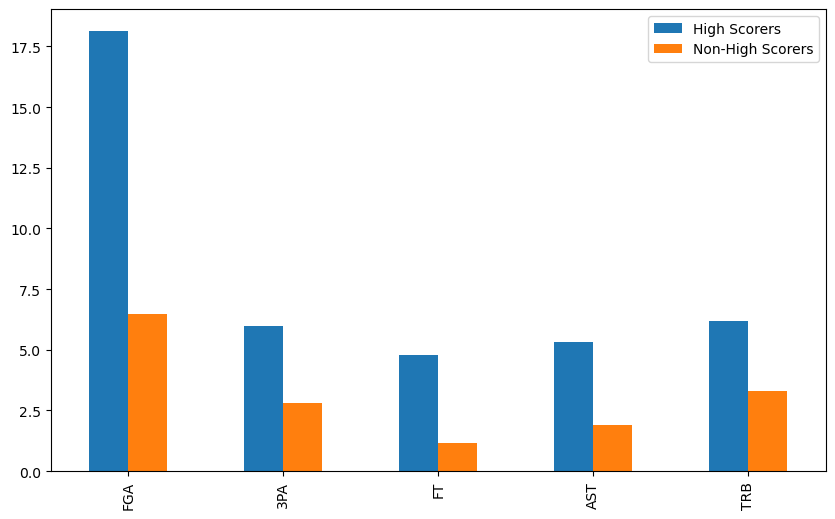

In [24]:
# Plotting
comparison.plot(kind='bar', figsize=(10, 6))

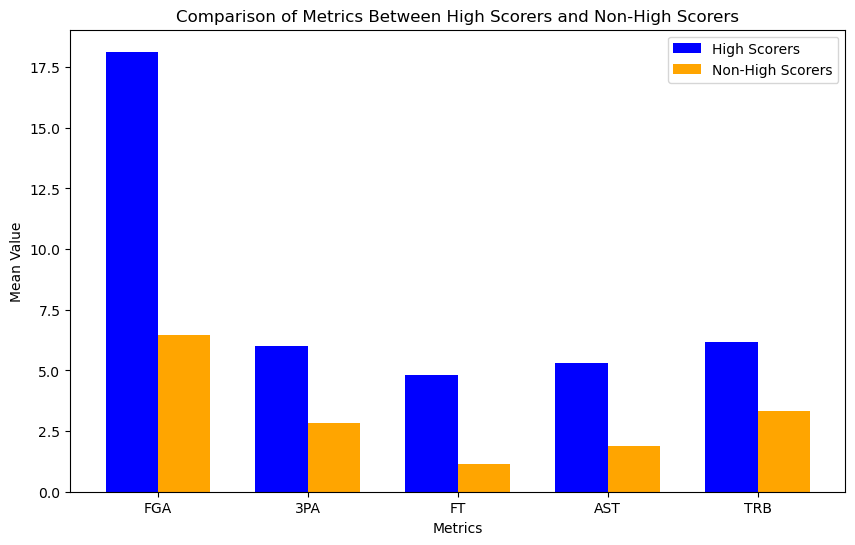

In [25]:
# Creating a bar plot to compare the metrics
x = np.arange(len(metrics)) 
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, high_scorers_means, width, label='High Scorers', color='blue')
bars2 = ax.bar(x + width/2, non_high_scorers_means, width, label='Non-High Scorers', color='orange')

# Labels and title
ax.set_xlabel("Metrics")
ax.set_ylabel("Mean Value")
ax.set_title("Comparison of Metrics Between High Scorers and Non-High Scorers")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Save the plot as an image
plt.savefig("comparison_plot.png", format="png", dpi=300)

# Show the plot
plt.show()